In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
import pickle

In [3]:
import re
import string

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
df = pd.read_csv("C:\\Projects\\toxicCommentClassification\\train.csv")

In [6]:
df.shape

(159571, 8)

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#checking training data for null values
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

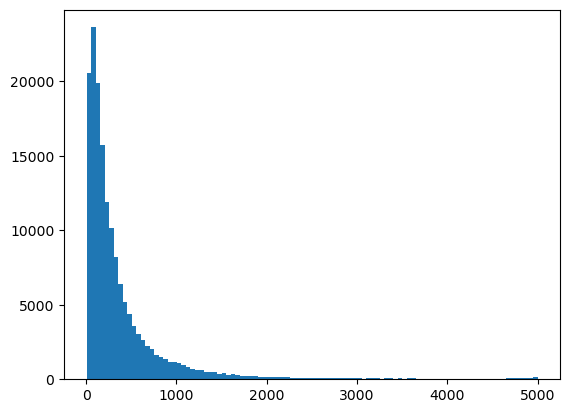

In [10]:
#plot a graph to find the average length of comments
lens = df.comment_text.str.len()
plt.hist(lens, bins = 100)
plt.show()

<Axes: >

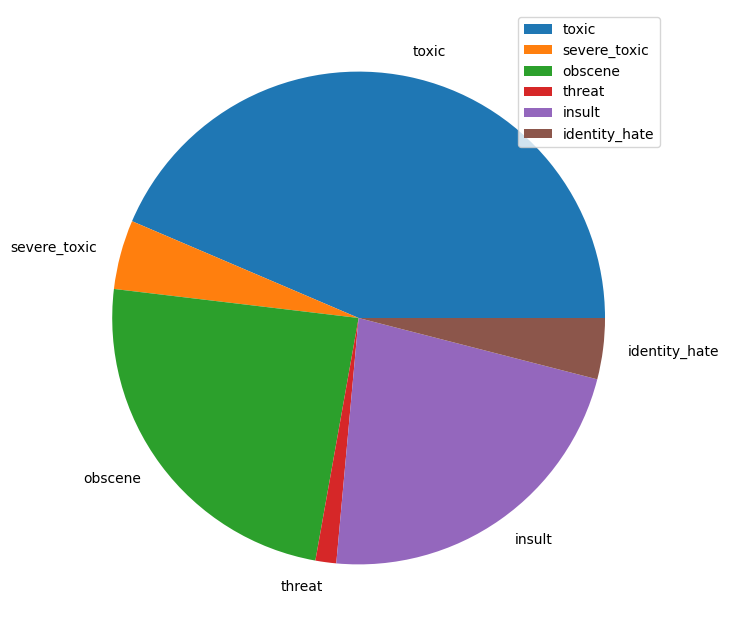

In [11]:
#labeling of data
labels = df[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

#plot a piechart to find the distribution of categories of toxic comments
labels.sum().plot.pie(y= 'Comment count' , figsize =(8,8),legend = True)

In [12]:
#find the correleation between the categories
correlation = labels.corr()
correlation.style.background_gradient(cmap = 'jet').set_precision(2)

C:\Users\Gauri\AppData\Local\Temp\ipykernel_21748\1482398867.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap = 'jet').set_precision(2)


,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.00,0.31,0.68,0.16,0.65,0.27
severe_toxic,0.31,1.00,0.40,0.12,0.38,0.20
obscene,0.68,0.40,1.00,0.14,0.74,0.29
threat,0.16,0.12,0.14,1.00,0.15,0.12
insult,0.65,0.38,0.74,0.15,1.00,0.34
identity_hate,0.27,0.20,0.29,0.12,0.34,1.00


average length of comment: 394.073


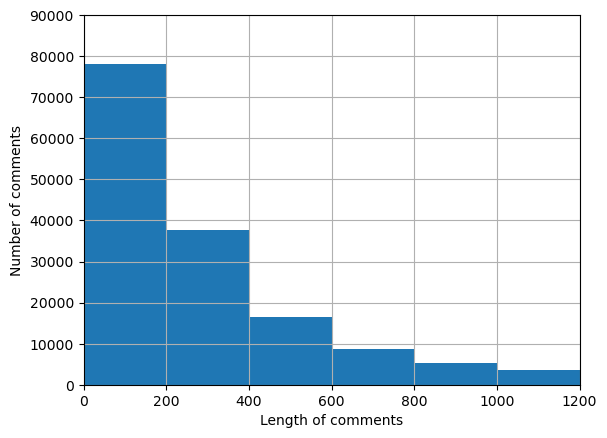

In [13]:
#the no. of comments having lengths varying from 0 to 1200

comment=df['comment_text']
comment = comment.values

label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
label = label.values

x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()


# Trim dataset

In [14]:
# Shuffling of indices, to avoid using train_test_split later
df = df.reindex(np.random.permutation(df.index))

In [15]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
62082,a61a17f8b7af55f1,"and your atual post:\n\n Hello, Sorry I couldn...",0,0,0,0,0,0
54094,908578f4912ee132,"""\n\n Naming, """"Army""""? \n\nThe page is called...",0,0,0,0,0,0
159545,ffb268f37788a011,", 7 March 2011 (UTC)\nAre you also User:Bmatts...",0,0,0,0,0,0
57110,98afc901ef00a144,A holiday wish to a Rhobite \n\nHappy Thanksgi...,0,0,0,0,0,0
124981,9c9c1b34e3998824,I am very sorry about writing a rude message t...,0,0,0,0,0,0


In [16]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
62082,a61a17f8b7af55f1,"and your atual post:\n\n Hello, Sorry I couldn...",0,0,0,0,0,0
54094,908578f4912ee132,"""\n\n Naming, """"Army""""? \n\nThe page is called...",0,0,0,0,0,0
159545,ffb268f37788a011,", 7 March 2011 (UTC)\nAre you also User:Bmatts...",0,0,0,0,0,0
57110,98afc901ef00a144,A holiday wish to a Rhobite \n\nHappy Thanksgi...,0,0,0,0,0,0
124981,9c9c1b34e3998824,I am very sorry about writing a rude message t...,0,0,0,0,0,0


# Preprocessing

In [17]:
stop_words=['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't", 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [18]:
print(df['comment_text'])

62082     and your atual post:\n\n Hello, Sorry I couldn...
54094     "\n\n Naming, ""Army""? \n\nThe page is called...
159545    , 7 March 2011 (UTC)\nAre you also User:Bmatts...
57110     A holiday wish to a Rhobite \n\nHappy Thanksgi...
124981    I am very sorry about writing a rude message t...
                                ...                        
33646     Aticle discussion \n\nCan we keep the actual a...
47535     "\n\n Wikipedia:WikiProject Mumbai \n\nWikiped...
124815    "\nThe sitcom that's shown during ""Must Shit ...
53824     Do you have third-party sourcing for notabilit...
50488     "\nA few quick options if anyone is interested...
Name: comment_text, Length: 159571, dtype: object


In [19]:
#make comment_text lowercase
df['comment_text'] = df['comment_text'].str.lower()
df['comment_text']

62082     and your atual post:\n\n hello, sorry i couldn...
54094     "\n\n naming, ""army""? \n\nthe page is called...
159545    , 7 march 2011 (utc)\nare you also user:bmatts...
57110     a holiday wish to a rhobite \n\nhappy thanksgi...
124981    i am very sorry about writing a rude message t...
                                ...                        
33646     aticle discussion \n\ncan we keep the actual a...
47535     "\n\n wikipedia:wikiproject mumbai \n\nwikiped...
124815    "\nthe sitcom that's shown during ""must shit ...
53824     do you have third-party sourcing for notabilit...
50488     "\na few quick options if anyone is interested...
Name: comment_text, Length: 159571, dtype: object

In [20]:
#remove the stop words declared
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['comment_text']

62082     atual post: hello, sorry attend concerns earli...
54094     " naming, ""army""? page called ""korean peopl...
159545    , 7 march 2011 (utc) also user:bmattson? webad...
57110      holiday wish rhobite happy thanksgiving rhobite!
124981    sorry writing rude message guy. will never aga...
                                ...                        
33646     aticle discussion can keep actual article disc...
47535     " wikipedia:wikiproject mumbai wikipedia:wikip...
124815    " sitcom shown ""must shit tv"" appears drew c...
53824     third-party sourcing notability independent tr...
50488     " quick options anyone interested hate ""(proc...
Name: comment_text, Length: 159571, dtype: object

In [21]:
RE_PATTERNS = {
    ' american ':
        [
            'amerikan'
        ],

    ' adolf ':
        [
            'adolf'
        ],


    ' hitler ':
        [
            'hitler'
        ],

    ' fuck':
        [
            '(f)(u|[^a-z0-9 ])(c|[^a-z0-9 ])(k|[^a-z0-9 ])([^ ])*',
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*k', 'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)', r'f\*',
            'feck ', ' fux ', 'f\*\*', 
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck', 'f ck'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@\$\$'
                                                           '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#\$%\^&\*][@#\$%\^&\*]', '[^a-z]anal ', 'a s s'
        ],

    ' ass hole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@\$\$hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h'
        ],

    ' bastard ':
        [
            'ba[s|z]+t[e|a]+rd'
        ],

    ' trans gender':
        [
            'transgender'
        ],

    ' gay ':
        [
            'gay'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
            'cunt', 'c u n t'
        ],

    ' bull shit ':
        [
            'bullsh\*t', 'bull\$hit'
        ],

    ' homo sex ual':
        [
            'homosexual'
        ],

    ' jerk ':
        [
            'jerk'
        ],

    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots'
                                                                                      'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', '(s)([^a-z ]*)(h)([^a-z ]*)(i)([^a-z ]*)(t)', 'shite', '\$hit', 's h i t'
        ],

    ' shit hole ':
        [
            'shythole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' rape ':
        [
            ' raped'
        ],

    ' dumb ass':
        [
            'dumbass', 'dubass'
        ],

    ' ass head':
        [
            'butthead'
        ],

    ' sex ':
        [
            'sexy', 's3x', 'sexuality'
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r'
        ],

    ' shut the fuck up':
        [
            'stfu'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' mother fucker':
        [
            ' motha ', ' motha f', ' mother f', 'motherucker',
        ],

    ' whore ':
        [
            'wh\*\*\*', 'w h o r e'
        ],
}


def clean_text(text,remove_repeat_text=True, remove_patterns_text=True):

  if remove_patterns_text:
    for target, patterns in RE_PATTERNS.items():
      for pat in patterns:
        text=str(text).replace(pat, target)

  if remove_repeat_text:
    text = re.sub(r'(.)\1{2,}', r'\1', text) 

  text = str(text).replace("\n", " ")
  text = re.sub(r'[^\w\s]',' ',text)
  text = re.sub('[0-9]',"",text)
  text = re.sub(" +", " ", text)
  text = re.sub("([^\x00-\x7F])+"," ",text)
  return text 


In [22]:
#clean the text
df['comment_text'] = df['comment_text'].apply(clean_text)
df['comment_text']

62082     atual post hello sorry attend concerns earlier...
54094      naming army page called korean people s air f...
159545     march utc also user bmattson webaddress discu...
57110      holiday wish rhobite happy thanksgiving rhobite 
124981    sorry writing rude message guy will never agai...
                                ...                        
33646     aticle discussion can keep actual article disc...
47535      wikipedia wikiproject mumbai wikipedia wikipr...
124815     sitcom shown must shit tv appears drew carey ...
53824     third party sourcing notability independent tr...
50488      quick options anyone interested hate proclaim...
Name: comment_text, Length: 159571, dtype: object

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

X= df["comment_text"]
y = df[df.columns[2:]].values


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

vocab_size = len(tokenizer.word_index) + 1 #size of the total number of uniques tokens in our dataset

X = tokenizer.texts_to_sequences(X) #converting our tokens into sequence of integers

X= pad_sequences(X, maxlen=1200,padding='post')

In [24]:
print(y)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [26]:
#Check for which integer a particular word has been assigned

index_to_word = {index: word for word, index in tokenizer.word_index.items()}
word = index_to_word[5080]

print(word)

rumors


In [27]:
print(X)

[[36630   216   210 ...     0     0     0]
 [ 1439  1132     3 ...     0     0     0]
 [  790    95    14 ...     0     0     0]
 ...
 [19913  1030   163 ...     0     0     0]
 [  662   471  2010 ...     0     0     0]
 [ 1131  3174   161 ...     0     0     0]]


# Split train, test and validation data

In [28]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [29]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

## Create model 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [32]:
MAX_FEATURES=200000 #number of words in vocab

In [33]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [34]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [36]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
6981/6981 [==============================] - 5603s 800ms/step - loss: 0.0606 - val_loss: 0.0439
Epoch 2/5
6981/6981 [==============================] - 6413s 919ms/step - loss: 0.0440 - val_loss: 0.0376
Epoch 3/5
6981/6981 [==============================] - 7073s 1s/step - loss: 0.0380 - val_loss: 0.0327
Epoch 4/5
6981/6981 [==============================] - 6105s 874ms/step - loss: 0.0334 - val_loss: 0.0279
Epoch 5/5
6981/6981 [==============================] - 5845s 837ms/step - loss: 0.0300 - val_loss: 0.0259


In [37]:
from matplotlib import pyplot as plt

In [38]:
history.history

{'loss': [0.06064104661345482,
  0.04396599158644676,
  0.03803000971674919,
  0.03343367204070091,
  0.030041394755244255],
 'val_loss': [0.0439169742166996,
  0.03761756792664528,
  0.03270865976810455,
  0.027850596234202385,
  0.025859134271740913]}

<Figure size 800x500 with 0 Axes>

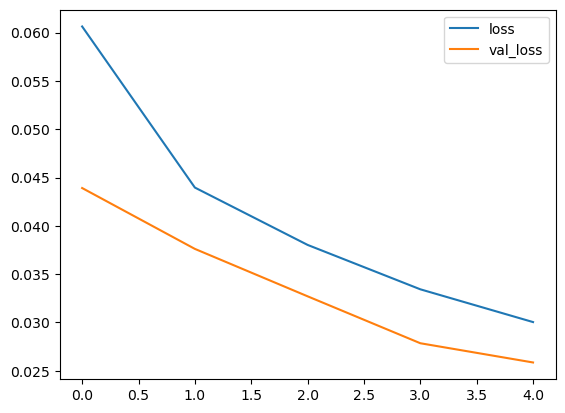

In [39]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [44]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [54]:
res=model.evaluate(test)

997/997 [==============================] - 133s 132ms/step - loss: 0.0247


In [45]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 4s 4s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [66]:
input_text1 ='You freaking suck! I am going to hit you.'

input_sequence1 = tokenizer.texts_to_sequences([input_text1])
input_sequence1 = pad_sequences(input_sequence1, maxlen=1200, padding='post')

model.predict(input_sequence1)

1/1 [==============================] - 0s 115ms/step


array([[0.99592406, 0.2964375 , 0.9810461 , 0.04275411, 0.93594074,
        0.09967547]], dtype=float32)

In [67]:
input_text2 ='I hate youuu'

input_sequence2 = tokenizer.texts_to_sequences([input_text2])
input_sequence2 = pad_sequences(input_sequence2, maxlen=1200, padding='post')

model.predict(input_sequence2)

1/1 [==============================] - 0s 120ms/step


array([[2.5008717e-01, 1.3692532e-04, 9.3079107e-03, 7.8456122e-03,
        2.7527988e-02, 6.6827619e-03]], dtype=float32)

## Evaluate model

In [56]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [57]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [58]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 181ms/step


In [59]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8895851969718933, Recall:0.8610629439353943, Accuracy:0.5215647220611572


In [60]:
pickle.dump(model, open('toxic1_model.pkl', 'wb'))